In [1]:
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import os

In [2]:
# load environment variables from .env file for project
dotenv_path = Path('../.env')
load_dotenv(dotenv_path=dotenv_path)

True

We converted the `comma-separated values files` (CSV) in a earlier stage to `Apache parquet` files. Parquet files make processing with `pandas` faster and more memory efficient. The processed parquet files are the `OUTPUT_DIRECTORY` given in the `.env` file of the project.

In [3]:
data_directory = os.getenv("OUTPUT_DIRECTORY")

List all files in the `OUTPUT_DIRECTORY`.

In [4]:
os.listdir(data_directory)

['OmzetEansCoicopsPlus_202206_202308.parquet',
 'converted_csvs',
 'OmzetEansCoicopsLidl_202007_202202.parquet',
 'OutputEansCoicopsPlus_202107_202205.parquet',
 'OmzetEansCoicopsPlus_202107_202205.parquet',
 'OmzetEansCoicopsLidl_202203_202308.parquet',
 'KassabonPlus_va_202201.parquet',
 'OmzetEansCoicopsLidl_2018_202006.parquet']

# Analysis of the LIDL data

Let's focus on the LIDL file first.

In [6]:
lidl_df = pd.read_parquet(os.path.join(data_directory, 'OmzetEansCoicopsLidl_2018_202006.parquet'), engine="pyarrow")
lidl_df.head()

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
0,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3184145,62789.0,Badreiniger,210.869995,213.0
1,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3185902,77358.0,Galzeep,52178.578125,35037.0
2,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3182649,90982.0,Allesreiniger SK1,149383.468750,150896.0
3,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3186380,90986.0,Allesreiniger eco,0.990000,1.0
4,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3192008,99134.0,Eco afwasmiddel SK3,28517.759766,28826.0


As per their definition COICOP definitions should be 5 digits long: 
- Two digits for the COICOP division, ranging from 01 until
- One digit for the COICOP group
- One digit for the COICOP class
- One digit for the COICOP subclass
See for more information the PDF [here](https://unstats.un.org/unsd/classifications/unsdclassifications/COICOP_2018_-_pre-edited_white_cover_version_-_2018-12-26.pdf). 
Check if this is the case for the coicop numbers in the LIDL dataframe.

In [9]:
lidl_df.coicop_number.str.len().value_counts().reset_index()

,coicop_number,count
0,5,123416
1,6,32925
2,1,1367


It seems there are COICOP numbers with 5 digits, 6 digits, and even 1 digits. Let's check the COICOP numbers with one digit first:

In [12]:
lidl_df[lidl_df.coicop_number.str.len() == 1].head(10)

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
3618,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927206,327185.0,Fietsbel ping,17.900000,18.0
3619,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927207,327187.0,Fietswielverlichting LED,73.010002,15.0
3620,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927208,327218.0,Zadelhoes,69.000000,69.0
3621,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927209,344101.0,Fietskrat wit,26.969999,3.0
3622,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193227,8005.0,Elektrische push-bel,2.000000,1.0
3623,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193231,8009.0,Spiraalslot,10.000000,2.0
3624,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193232,8010.0,Kettingslot,120.000000,24.0
3625,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193233,8017.0,Fietstas 35 L,14.990000,1.0
3626,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193235,8029.0,Bagagedragerkussen,43.889999,11.0
3627,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193239,8035.0,Fietszadel design,5.000000,1.0


The COICOP number for COICOP numbers of length 1 has value 0 for the first 10 rows. See which other values are possible:

In [14]:
lidl_df[lidl_df.coicop_number.str.len() == 1].coicop_number.value_counts()

coicop_number
0    1367
Name: count, dtype: int64

It seems all COICOP numbers with lenght 1 have value 0. This seems a special value? Let's check the COICOP values with 6 digits:

In [16]:
lidl_df[lidl_df.coicop_number.str.len() == 6].head(10)

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
29,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3180116,118452.0,Professionele haarzorg BB Balm,20812.519531,5217.0
30,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3186854,133014.0,Hairvital cr?mespoeling SK3,22647.830078,25447.0
31,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183260,1746.0,Stylingmousse extra sterk SK4,11057.309570,11169.0
32,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183731,368.0,Shampoo 2 in 1 pro vitamine SK2,17592.630859,19767.0
33,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3188107,108082.0,Finding Nemo knijpzeep,123.169998,43.0
35,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189861,108087.0,Finding Nemo magische handdoek,1642.510010,876.0
36,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189984,108448.0,Finding Nemo badkleurtabletten SK1,116.900002,40.0
37,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3180124,119480.0,Knijpzeep Cars,10189.910156,4092.0
38,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3183252,1724.0,Douchegel sport/sens SK8,30864.310547,34679.0
39,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3190510,5515307.0,Douchegel XXL SK1,1.590000,1.0


Check what are the possible values for COICOPs with 6 digits:

In [18]:
lidl_df[lidl_df.coicop_number.str.len() == 6].coicop_number.value_counts()

coicop_number
999999    26699
121320     5629
121210      499
121310       98
Name: count, dtype: int64

It looks like there are only four different values for COICOP numbers with 6 digits:
- 999999
- 121320     
- 121210      
- 121310       

`999999` seems a special value, maybe missing values or an additional category? The other values are not that clear. Check the COICOP numbers with lenght 5.

In [19]:
lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.value_counts()

coicop_number
31220    7976
11140    7914
21210    7059
31210    5781
11270    5099
         ... 
11930     133
21110     110
95410     110
12130      72
95220      41
Name: count, Length: 76, dtype: int64

It seems there are 76 unique COICOP values with length 5. Check is this is indeed the case:

In [20]:
lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.nunique()

76

This seems correct. Because we 5 and 6 digit COICOP numbers, it might be the case that the CBS classifies the COICOP one level deeper than the specification. The COICOP specification specifies the COICOP division using two digits. The first categories in the COICOP classification 1-9 are defined using a leading zero. See if we can find any leading zeroes in the COICOP numbers defined by LIDL.

In [23]:
lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.str.startswith("0").sum()

0

This does not seem to be the case. It looks like the coicop numbers in the LIDL file are missing the leading zero. This means that the 6 digit labels we found about are part of COICOP division `12`, "Insurance and financial services". This is a bit strange because above the product descriptions appear to be all "articles for personal hygiene" which are defined to be in COICOP division `13.1`.

In [26]:
lidl_df[(lidl_df.coicop_number.str.len() == 6) & (lidl_df.coicop_number.str.startswith("12"))].head(10)

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
29,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3180116,118452.0,Professionele haarzorg BB Balm,20812.519531,5217.0
30,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3186854,133014.0,Hairvital cr?mespoeling SK3,22647.830078,25447.0
31,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183260,1746.0,Stylingmousse extra sterk SK4,11057.309570,11169.0
32,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183731,368.0,Shampoo 2 in 1 pro vitamine SK2,17592.630859,19767.0
33,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3188107,108082.0,Finding Nemo knijpzeep,123.169998,43.0
35,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189861,108087.0,Finding Nemo magische handdoek,1642.510010,876.0
36,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189984,108448.0,Finding Nemo badkleurtabletten SK1,116.900002,40.0
37,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3180124,119480.0,Knijpzeep Cars,10189.910156,4092.0
38,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3183252,1724.0,Douchegel sport/sens SK8,30864.310547,34679.0
39,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3190510,5515307.0,Douchegel XXL SK1,1.590000,1.0


Let's assume for now that the labeling is correct, and add the trailing zero to COICOP numbers with length 5.

In [30]:
lidl_df.loc[lidl_df.coicop_number.str.len() == 5, 'coicop_number'] = lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.apply(lambda s: f"0{s}")

Check if all COICOP numbers with length 5 are removed:

In [31]:
lidl_df.coicop_number.str.len().value_counts().reset_index()

,coicop_number,count
0,6,156341
1,1,1367


Derive the COICOP division (the first two digits in the COICOP number) and assign them to a new column.

In [34]:
lidl_df['coicop_division'] = lidl_df[lidl_df.coicop_number.str.len() == 6].coicop_number.str[:2]
lidl_df.head()

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount,coicop_division
0,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3184145,62789.0,Badreiniger,210.869995,213.0,05
1,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3185902,77358.0,Galzeep,52178.578125,35037.0,05
2,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3182649,90982.0,Allesreiniger SK1,149383.468750,150896.0,05
3,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3186380,90986.0,Allesreiniger eco,0.990000,1.0,05
4,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3192008,99134.0,Eco afwasmiddel SK3,28517.759766,28826.0,05


When we have the COICOP division, we can count the number of products in each division.

In [42]:
lidl_df.coicop_division.value_counts()

coicop_division
01    72840
99    26699
03    18556
05    15302
02     9148
09     6915
12     6226
06      655
Name: count, dtype: int64

We can also plot this in a barplot:

<Axes: xlabel='coicop_division'>

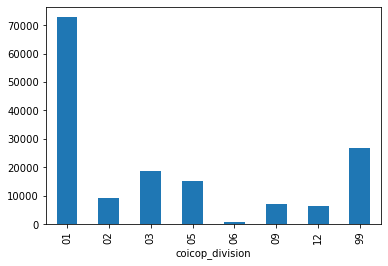

In [41]:
lidl_df.coicop_division.value_counts().sort_index().plot(kind="bar")

According to this barchart the following COICOP divisions are present in the LIDL dataset:
- 01 Food and non-alcoholic beverages
- 02 Alcoholic beverages, tobacco and narcotics
- 03 Clothing and footwear
- 05 Furnishings, household equipment and routine household maintenance
- 06 Health
- 09 Recreation, sport and culture
- 12 Insurance and financial services
- 99 Does not exist in COICOP divisions, this is probably some CBS specific category?

As we have seen earlier, the division 12 present in the list here, is probably mixed up with COICOP division 13 "Personal care, social protection and miscellaneous goods and services". The LIDL data also contains a column with COICOP descriptions. Let's see which divisions have which descriptions:

In [46]:
coicop_division_descriptions = lidl_df.groupby(by="coicop_division")["coicop_name"].value_counts().reset_index()
coicop_division_descriptions

,coicop_division,coicop_name,count
0,01,Overige bakkerijproducten,7914
1,01,"Gedroogd, gezouten of gerookt vlees",5099
2,01,Kaas en kwark,4977
3,01,Verse of gekoelde groenten behalve aardappele...,4902
4,01,"Gedroogde groenten, andere bereidingen en con...",4444
...,...,...,...
76,12,Artikelen voor persoonlijke hygiëne en wellne...,5629
77,12,Elektrische apparaten voor lichaamsverzorging,499
78,12,Niet-elektrische apparaten,98
79,99,Onbekend,17532


In [48]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "01"]

,coicop_division,coicop_name,count
0,01,Overige bakkerijproducten,7914
1,01,"Gedroogd, gezouten of gerookt vlees",5099
2,01,Kaas en kwark,4977
3,01,Verse of gekoelde groenten behalve aardappele...,4902
4,01,"Gedroogde groenten, andere bereidingen en con...",4444
5,01,Kant-en-klaarmaaltijden,3555
6,01,Brood,3283
7,01,Chocolade,3192
8,01,Vers of gekoeld fruit,3025
9,01,Gedroogd fruit en noten,3018


The COICOP descriptions for COICOP division 01 seem to be all related to "Food and non-alcoholic beverages".

In [49]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "02"]

,coicop_division,coicop_name,count
44,02,Wijn van druiven,7059
45,02,Pils,1806
46,02,Distillatiewijn,173
47,02,Gedistilleerde dranken en likeuren,110


The products for COICOP division 02 are all "Alcoholic beverages, tobacco and narcotics"

In [50]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "03"]

,coicop_division,coicop_name,count
48,03,Dameskleding,7976
49,03,Herenkleding,5781
50,03,Baby- en kinderkleding,2339
51,03,Damesschoenen,1049
52,03,Herenschoenen,818
53,03,Overige kledingartikelen,343
54,03,Kinderschoenen,250


Also the products for COICOP division 03 are all "Clothing and footwear".

In [51]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "05"]

,coicop_division,coicop_name,count
55,05,Schoonmaak- en onderhoudsproducten,3130
56,05,Overige niet-duurzame kleine huishoudproducte...,2498
57,05,Beddengoed,1808
58,05,Niet-elektrische keukenartikelen,1799
59,05,Diverse losse onderdelen,1773
60,05,Grote gereedschappen en werktuigen met motor,1575
61,05,"Koffiezetapparaten, waterkokers en dergelijke",1319
62,05,Tafel- en toiletlinnen,586
63,05,Kleine handgereedschappen,328
64,05,"Glaswerk, kristal en aardewerk of porselein",297


In [52]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "06"]

,coicop_division,coicop_name,count
66,06,Overige medische producten n.e.g.,414
67,06,Farmaceutische producten,241


The products in COICOP division 06 seems to be all related to "Health".

In [53]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "09"]

,coicop_division,coicop_name,count
68,09,Speelgoed en feestartikelen,3622
69,09,Producten voor huisdieren,1672
70,09,Planten en bloemen,907
71,09,Overige schrijfwaren en tekenartikelen,202
72,09,Fictieboeken,197
73,09,Spellen en hobby’s,164
74,09,Producten van papier,110
75,09,Tijdschriften,41


The products in COICOP division 09 look all related to the broader COICOP description "Recreation, sport and culture". Especially, the products here look part of the following COICOP groups:
- 09.1 Recreational durables
- 09.2 Other recreational goods
- 09.3 Garden products and pets
- 09.7 Newspapers, books and stationery

In [54]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "12"]

,coicop_division,coicop_name,count
76,12,Artikelen voor persoonlijke hygiëne en wellne...,5629
77,12,Elektrische apparaten voor lichaamsverzorging,499
78,12,Niet-elektrische apparaten,98


The products in COICOP division 12 should be related to "Insurance and financial services". However, it looks like all the products and their descriptions here are instead "Personal care, social protection and miscellaneous goods and services". Thus, we think these products instead should have COICOP_division 13 instead.

In [55]:
coicop_division_descriptions[coicop_division_descriptions.coicop_division == "99"]

,coicop_division,coicop_name,count
79,99,Onbekend,17532
80,99,Divers,9167


The last category with COICOP division "99" seems to be an "unknown" or "divers" category. This looks like an NSI specific category not available in the COICOP specification. In general, we see that all but one category follow the COICOP specification. We will have to look into what went wrong with COICOP division "12". 

In conclusion, we see that the CBS has an extra COICOP level because most category should have 6 digits. The 5 digit codes in the LIDL file contain COICOP numbers under 10 without the zero prefix. By adding this prefix back we standardized most COICOP numbers and could derive COICOP division numbers. These seem to be overall correct. There's still a collection of rows that have COICOP number 0. Let's analyze the product descriptions for the products with COICOP number 0.

In [58]:
lidl_df[lidl_df.coicop_number == "0"].coicop_name.value_counts().reset_index()

,coicop_name,count
0,Onbekend,1367


Apparently, products with COICOP number 0 are another "unknown" category. We do not know how these products are related to the other category of "unknown" products with "COICOP division" 99.